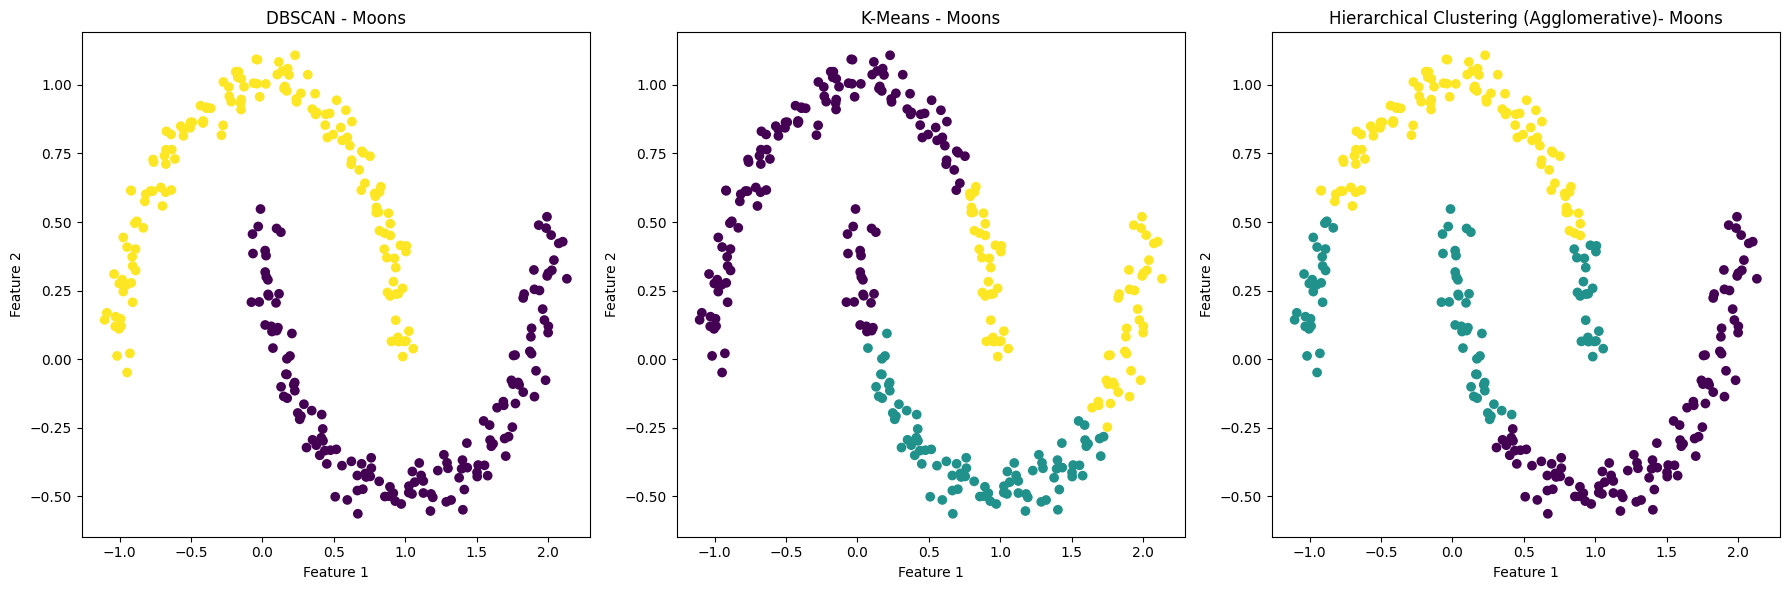

DBSCAN Silhouette Score - Moons: 0.33078776489960326
K-Means Silhouette Score - Moons: 0.3945530419628663
Agglomerative Silhouette Score - Moons: 0.31532529114982893
----------------------------------------


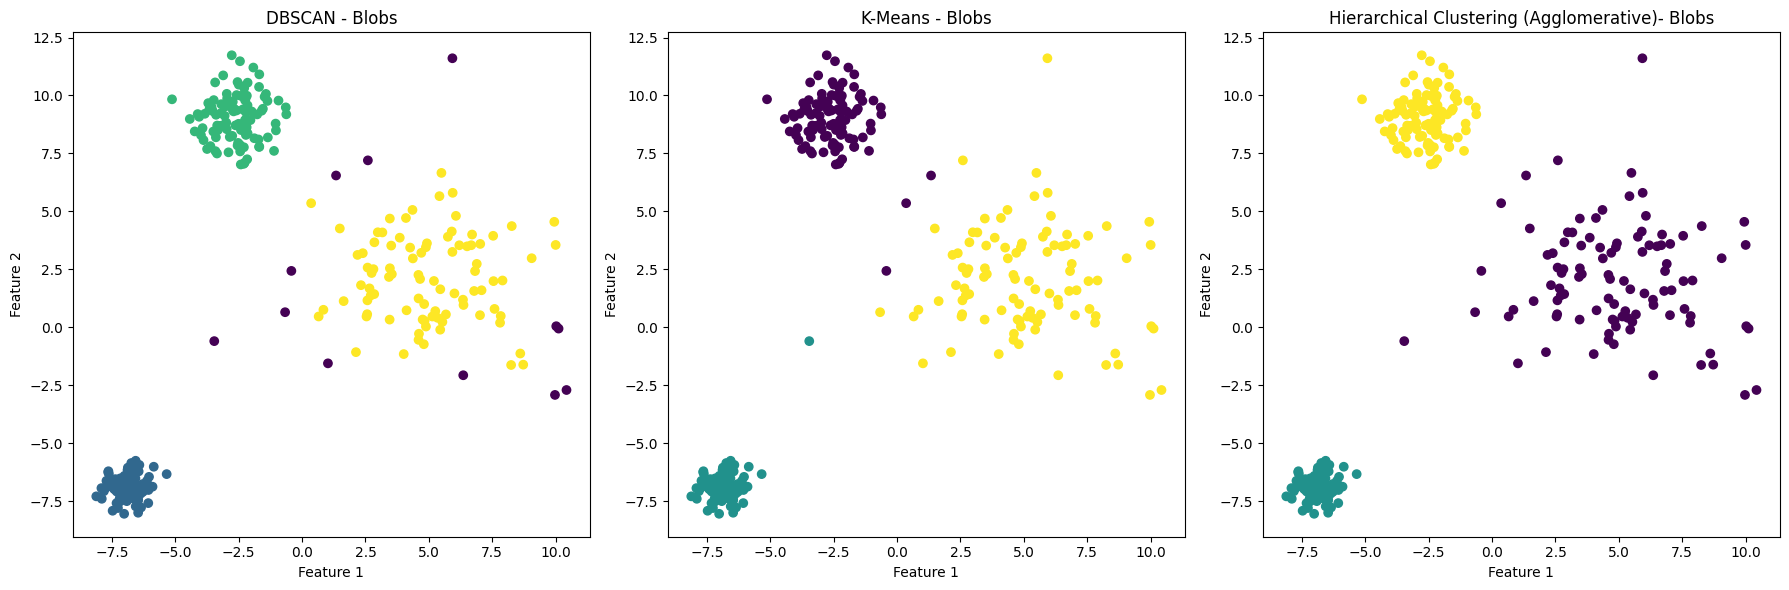

DBSCAN Silhouette Score - Blobs: 0.7186667236713882
K-Means Silhouette Score - Blobs: 0.7844428742648373
Agglomerative Silhouette Score - Blobs: 0.7829608619633761
----------------------------------------


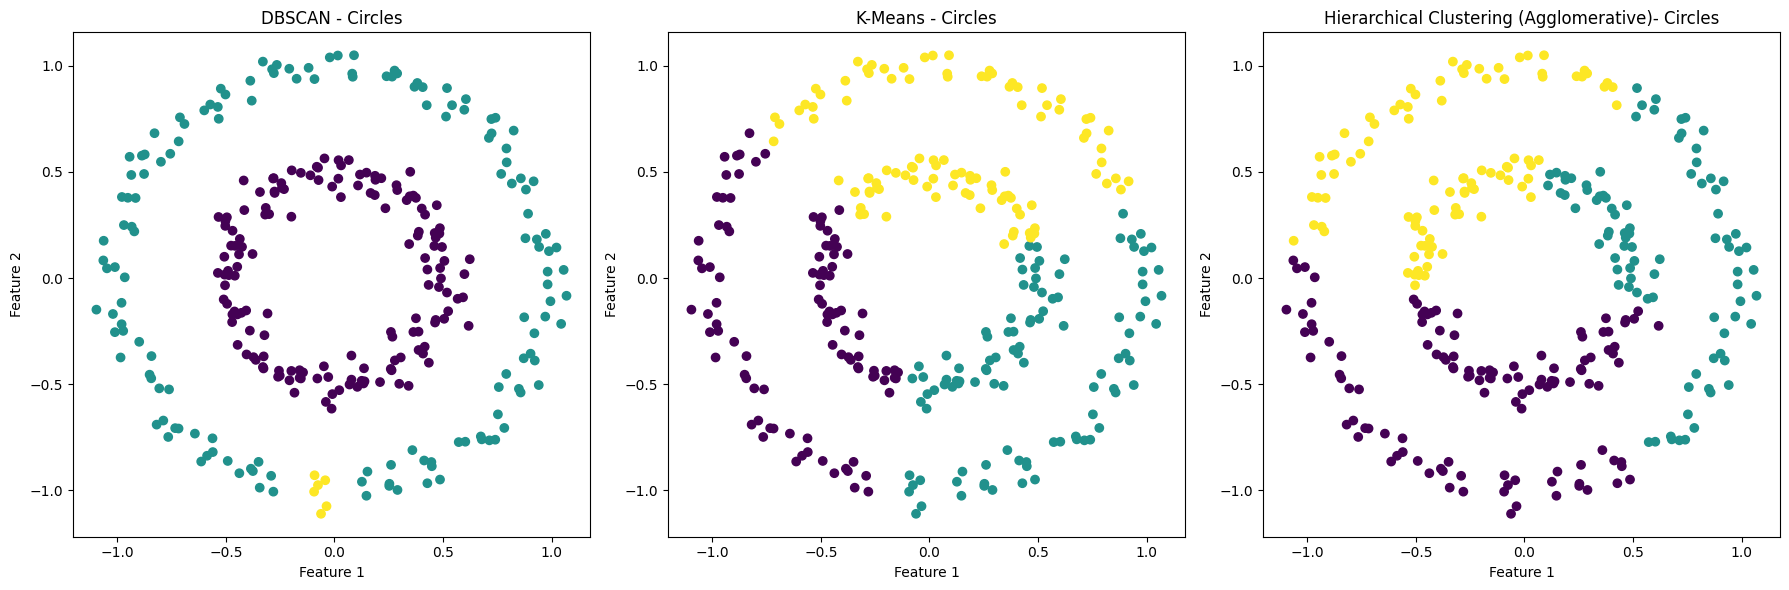

DBSCAN Silhouette Score - Circles: 0.004320163566210282
K-Means Silhouette Score - Circles: 0.38053579980756624
Agglomerative Silhouette Score - Circles: 0.3509457362216576
----------------------------------------


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Create synthetic datasets
datasets = {
    'moons': make_moons(n_samples=300, noise=0.05, random_state=42), # Good for DBSCAN (non-spherical clusters)
    'blobs': make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42), # DBSCAN struggles with varying densities
    'circles': make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42) # Non-linearly separable
}

# Function to apply DBSCAN, KMeans, and Hierarchical Clustering
def apply_clustering(X):
    # Standardize data with StandardScaler
    X_scaled = StandardScaler().fit_transform(X)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42) #n_clusters=3
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Hierarchical clustering - Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=3)
    agglomerative_labels = agglomerative.fit_predict(X_scaled)

    return dbscan_labels, kmeans_labels, agglomerative_labels

# Function to plot the clustering results
def plot_clustering(X, dbscan_labels, kmeans_labels, agglomerative_labels, dataset_name_up):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # DBSCAN plot
    axes[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
    axes[0].set_title(f'DBSCAN - {dataset_name_up}')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    # K-Means plot
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
    axes[1].set_title(f'K-Means - {dataset_name_up}')
    axes[1].set_xlabel('Feature 1')     
    axes[1].set_ylabel('Feature 2')

    # Agglomerative Clustering plot
    axes[2].scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis')
    axes[2].set_title(f'Hierarchical Clustering (Agglomerative)- {dataset_name_up}')
    axes[2].set_xlabel('Feature 1')     
    axes[2].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()


# Function to compute and print silhouette scores for comparison
def compare_performance(X, dbscan_labels, kmeans_labels, agglomerative_labels, dataset_name_up):
    # Calculate silhouette scores
    dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1 # DBSCAN Silhouette Score (handle case where all points are labeled as noise (label -1))
    kmeans_silhouette = silhouette_score(X, kmeans_labels) # K-Means Silhouette Score
    agglomerative_silhouette = silhouette_score(X, agglomerative_labels) # Agglomerative Silhouette Score

    print(f"DBSCAN Silhouette Score - {dataset_name_up}: {dbscan_silhouette}")
    print(f"K-Means Silhouette Score - {dataset_name_up}: {kmeans_silhouette}")
    print(f"Agglomerative Silhouette Score - {dataset_name_up}: {agglomerative_silhouette}")
    print("-" * 40) # -----


# Call each dataset and apply clustering
for dataset_name, data in datasets.items():
    X, y = data
    dataset_name_up = dataset_name.capitalize()  # Convert dataset name to capitalize starting letter
    dbscan_labels, kmeans_labels, agglomerative_labels = apply_clustering(X)
    plot_clustering(X, dbscan_labels, kmeans_labels, agglomerative_labels, dataset_name_up) # plot all 3 datasets
    compare_performance(X, dbscan_labels, kmeans_labels, agglomerative_labels, dataset_name_up) # compare silhouette scores
   
